In [77]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import statsmodels.api as sm
from itertools import combinations

### Lab 1: Subset Selection Methods

In [78]:
df = pd.read_csv('Hitters.csv')
df.head()

,Unnamed: 0,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,...,CRuns,CRBI,CWalks,League,Division,PutOuts,Assists,Errors,Salary,NewLeague
0,-Andy Allanson,293,66,1,30,29,14,1,293,66,...,30,29,14,A,E,446,33,20,NaN,A
1,-Alan Ashby,315,81,7,24,38,39,14,3449,835,...,321,414,375,N,W,632,43,10,475.0,N
2,-Alvin Davis,479,130,18,66,72,76,3,1624,457,...,224,266,263,A,W,880,82,14,480.0,A
3,-Andre Dawson,496,141,20,65,78,37,11,5628,1575,...,828,838,354,N,E,200,11,3,500.0,N
4,-Andres Galarraga,321,87,10,39,42,30,2,396,101,...,48,46,33,N,E,805,40,4,91.5,N


In [79]:
df.shape

(322, 21)

In [80]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 322 entries, 0 to 321
Data columns (total 21 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  322 non-null    object 
 1   AtBat       322 non-null    int64  
 2   Hits        322 non-null    int64  
 3   HmRun       322 non-null    int64  
 4   Runs        322 non-null    int64  
 5   RBI         322 non-null    int64  
 6   Walks       322 non-null    int64  
 7   Years       322 non-null    int64  
 8   CAtBat      322 non-null    int64  
 9   CHits       322 non-null    int64  
 10  CHmRun      322 non-null    int64  
 11  CRuns       322 non-null    int64  
 12  CRBI        322 non-null    int64  
 13  CWalks      322 non-null    int64  
 14  League      322 non-null    object 
 15  Division    322 non-null    object 
 16  PutOuts     322 non-null    int64  
 17  Assists     322 non-null    int64  
 18  Errors      322 non-null    int64  
 19  Salary      263 non-null    f

In [81]:
df = df.iloc[:, 1:]
df.isnull().sum()

AtBat         0
Hits          0
HmRun         0
Runs          0
RBI           0
Walks         0
Years         0
CAtBat        0
CHits         0
CHmRun        0
CRuns         0
CRBI          0
CWalks        0
League        0
Division      0
PutOuts       0
Assists       0
Errors        0
Salary       59
NewLeague     0
dtype: int64

In [82]:
df_hitter = df.dropna()

In [83]:
df_hitter.isnull().sum()

AtBat        0
Hits         0
HmRun        0
Runs         0
RBI          0
Walks        0
Years        0
CAtBat       0
CHits        0
CHmRun       0
CRuns        0
CRBI         0
CWalks       0
League       0
Division     0
PutOuts      0
Assists      0
Errors       0
Salary       0
NewLeague    0
dtype: int64

In [84]:
# Object columns:
object_col = df_hitter.dtypes == object
object_col[object_col == True].index

Index(['League', 'Division', 'NewLeague'], dtype='object')

In [85]:
df_hitter[object_col[object_col == True].index].head()

,League,Division,NewLeague
1,N,W,N
2,A,W,A
3,N,E,N
4,N,E,N
5,A,W,A


In [86]:
df_hitter[object_col[object_col == True].index].describe()

,League,Division,NewLeague
count,263,263,263
unique,2,2,2
top,A,W,A
freq,139,134,141


In [87]:
dummies = pd.get_dummies(df_hitter[object_col[object_col == True].index])
dummies.head()

,League_A,League_N,Division_E,Division_W,NewLeague_A,NewLeague_N
1,0,1,0,1,0,1
2,1,0,0,1,1,0
3,0,1,1,0,0,1
4,0,1,1,0,0,1
5,1,0,0,1,1,0


In [88]:
df_dummies = dummies.iloc[:, ::2] 
df_dummies.head()

,League_A,Division_E,NewLeague_A
1,0,0,0
2,1,0,1
3,0,1,0
4,0,1,0
5,1,0,1


In [89]:
df_hitter.shape

(263, 20)

In [90]:
df_hitter.drop(object_col[object_col == True].index, axis = 1, inplace = True)

C:\Users\u0125384\Anaconda3\lib\site-packages\pandas\core\frame.py:3997: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [91]:
df_hitter.shape

(263, 17)

In [92]:
df = pd.concat([df_hitter, df_dummies], axis = 1)
df.shape

(263, 20)

In [93]:
df.head()

,AtBat,Hits,HmRun,Runs,RBI,Walks,Years,CAtBat,CHits,CHmRun,CRuns,CRBI,CWalks,PutOuts,Assists,Errors,Salary,League_A,Division_E,NewLeague_A
1,315,81,7,24,38,39,14,3449,835,69,321,414,375,632,43,10,475.0,0,0,0
2,479,130,18,66,72,76,3,1624,457,63,224,266,263,880,82,14,480.0,1,0,1
3,496,141,20,65,78,37,11,5628,1575,225,828,838,354,200,11,3,500.0,0,1,0
4,321,87,10,39,42,30,2,396,101,12,48,46,33,805,40,4,91.5,0,1,0
5,594,169,4,74,51,35,11,4408,1133,19,501,336,194,282,421,25,750.0,1,0,1


In [94]:
# Get the features of the dataframe
features = df.columns.tolist()

# Remove the target from features
features.remove('Salary')
features

['AtBat',
 'Hits',
 'HmRun',
 'Runs',
 'RBI',
 'Walks',
 'Years',
 'CAtBat',
 'CHits',
 'CHmRun',
 'CRuns',
 'CRBI',
 'CWalks',
 'PutOuts',
 'Assists',
 'Errors',
 'League_A',
 'Division_E',
 'NewLeague_A']

In [48]:
# Have a look at an example of features combination 
comb = combinations(features, 2)
list(comb)

[('AtBat', 'Hits'),
 ('AtBat', 'HmRun'),
 ('AtBat', 'Runs'),
 ('AtBat', 'RBI'),
 ('AtBat', 'Walks'),
 ('AtBat', 'Years'),
 ('AtBat', 'CAtBat'),
 ('AtBat', 'CHits'),
 ('AtBat', 'CHmRun'),
 ('AtBat', 'CRuns'),
 ('AtBat', 'CRBI'),
 ('AtBat', 'CWalks'),
 ('AtBat', 'PutOuts'),
 ('AtBat', 'Assists'),
 ('AtBat', 'Errors'),
 ('AtBat', 'League_A'),
 ('AtBat', 'Division_E'),
 ('AtBat', 'NewLeague_A'),
 ('Hits', 'HmRun'),
 ('Hits', 'Runs'),
 ('Hits', 'RBI'),
 ('Hits', 'Walks'),
 ('Hits', 'Years'),
 ('Hits', 'CAtBat'),
 ('Hits', 'CHits'),
 ('Hits', 'CHmRun'),
 ('Hits', 'CRuns'),
 ('Hits', 'CRBI'),
 ('Hits', 'CWalks'),
 ('Hits', 'PutOuts'),
 ('Hits', 'Assists'),
 ('Hits', 'Errors'),
 ('Hits', 'League_A'),
 ('Hits', 'Division_E'),
 ('Hits', 'NewLeague_A'),
 ('HmRun', 'Runs'),
 ('HmRun', 'RBI'),
 ('HmRun', 'Walks'),
 ('HmRun', 'Years'),
 ('HmRun', 'CAtBat'),
 ('HmRun', 'CHits'),
 ('HmRun', 'CHmRun'),
 ('HmRun', 'CRuns'),
 ('HmRun', 'CRBI'),
 ('HmRun', 'CWalks'),
 ('HmRun', 'PutOuts'),
 ('HmRun', 'Ass

In [57]:
# Number of combinations for different k 
for k in range(1, len(features) + 1):
    comb = combinations(features, k)
    print(k, len(list(comb)))

1 19
2 171
3 969
4 3876
5 11628
6 27132
7 50388
8 75582
9 92378
10 92378
11 75582
12 50388
13 27132
14 11628
15 3876
16 969
17 171
18 19
19 1


In [98]:
# Perform linear regression for a given set of features
def regression_model(data, features):
    x = sm.add_constant(data[features])
    y = data['Salary']
    model = sm.OLS(y,x)
    result = model.fit()
    RSS = result.ssr
    return result, RSS

In [607]:
def best_k_model(data, features, k):
    
    model_results = []
    RSS_results = []
    for comb in combinations(features, k):
        model, RSS = regression_model(data, list(comb))
        model_results.append(model)
        RSS_results.append(RSS)
        
    argmin = np.argmin(RSS_results)
    
    return model_results[argmin]

In [109]:
best_models = []
for k in range(1, len(features)+1):
    print(k)
    best_models.append(best_k_model(df, features, k))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


<IPython.core.display.Javascript object>


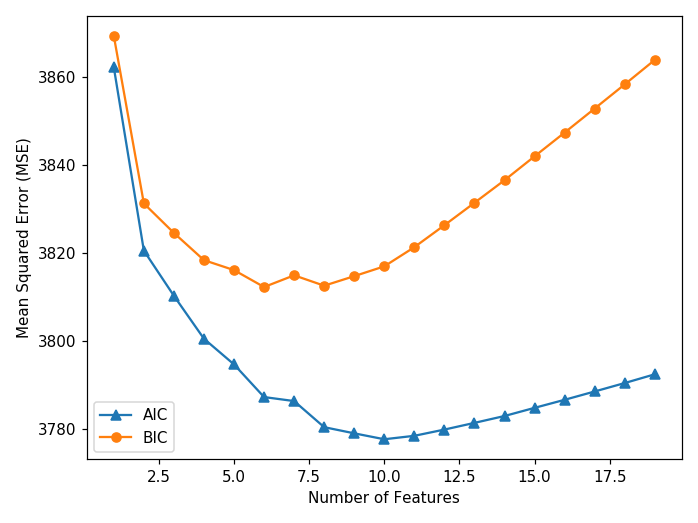

In [132]:
%matplotlib notebook
rss = [best_models[i].ssr for i in range(len(features))]
AIC = [best_models[i].aic for i in range(len(features))]
BIC = [best_models[i].bic for i in range(len(features))]
#plt.plot(range(len(features)), rss, label = 'RSS')
plt.plot(range(1, len(features)+1), AIC, label = 'AIC', marker = '^')
plt.plot(range(1, len(features)+1), BIC, label = 'BIC', marker = 'o')
plt.xlabel('Number of Features')
plt.ylabel('Mean Squared Error (MSE)')
plt.legend()
plt.tight_layout()
plt.savefig('AIC_BIC.png', dpi = 100)

<IPython.core.display.Javascript object>


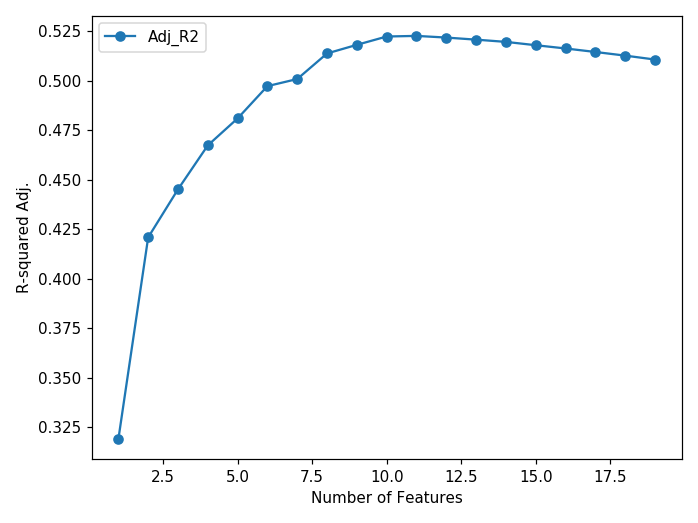

In [148]:
%matplotlib notebook
Adj_R2 = [best_models[i].rsquared_adj for i in range(len(features))]
#plt.plot(range(len(features)), rss, label = 'RSS')
plt.plot(range(1, len(features)+1), Adj_R2, label = 'Adj_R2', marker = 'o')
plt.xlabel('Number of Features')
plt.ylabel('R-squared Adj.')
plt.legend()
plt.tight_layout()
plt.savefig('r_squared Adj.png', dpi = 100)

<IPython.core.display.Javascript object>


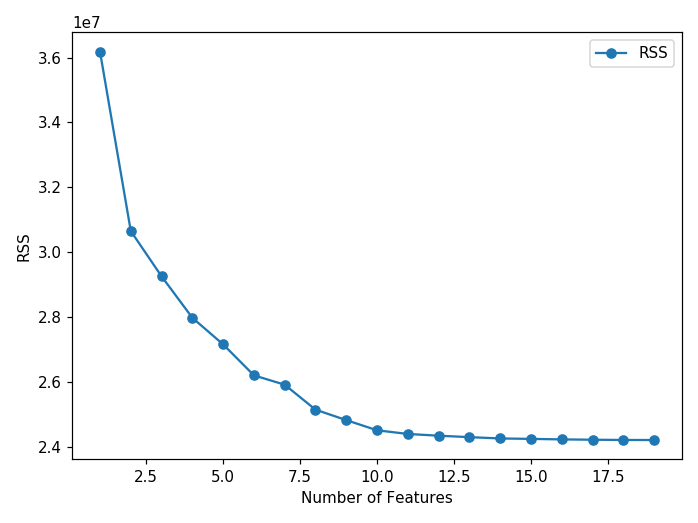

In [159]:
%matplotlib notebook

plt.plot(range(1, len(features)+1), rss, label = 'RSS', marker = 'o')
plt.xlabel('Number of Features')
plt.ylabel('RSS')
plt.legend()
plt.tight_layout()
plt.savefig('RSS.png', dpi = 100)

<IPython.core.display.Javascript object>


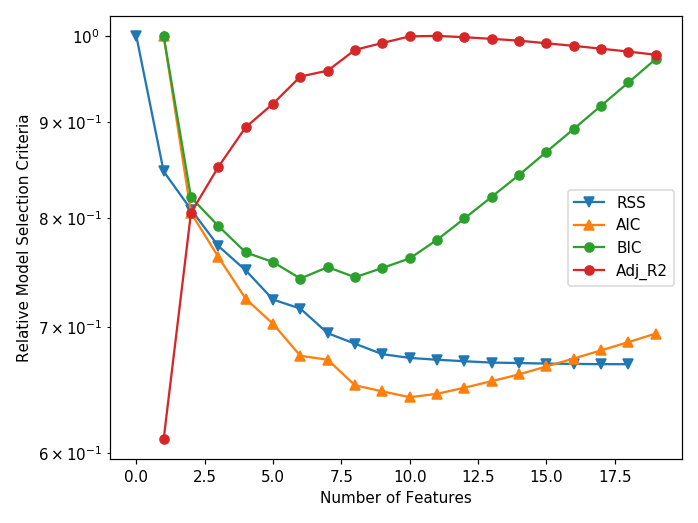

In [155]:
%matplotlib notebook
plt.plot(range(len(features)), rss/max(rss), label = 'RSS', marker = 'v')
plt.plot(range(1, len(features)+1), (AIC/max(AIC))**20, label = 'AIC', marker = '^')
plt.plot(range(1, len(features)+1), (BIC/max(BIC))**20, label = 'BIC', marker = 'o')
plt.plot(range(1, len(features)+1), Adj_R2/max(Adj_R2), label = 'Adj_R2', marker = 'o')
plt.xlabel('Number of Features')
plt.ylabel('Relative Model Selection Criteria')
plt.semilogy()
plt.legend()
plt.tight_layout()
plt.savefig('Relative Model Selection Criteria.png', dpi = 100)

In [156]:
for method_name, method in zip(['AIC', 'BIC', 'Adj_R2', 'RSS'], [AIC, BIC, rss]):
    print(method_name, ', Optimium number of features: {}'.format(np.argmin(method)))
print('Adj_R2, Optimium number of features: {}'.format(np.argmax(Adj_R2)))

AIC , Optimium number of features: 9
BIC , Optimium number of features: 5
Adj_R2 , Optimium number of features: 18
Adj_R2, Optimium number of features: 10


In [161]:
# We can fit the RSS shows two critical points where the slope changes significantly,
# one is at k = 2 and the other is at 10. By looking at the latter one and compare with other methodes
# predictions, we can say a model with 9-10 features can be a good selection.
best_models[9].params

const          50.155385
AtBat          -2.168650
Hits            6.918017
Walks           5.773225
CAtBat         -0.130080
CRuns           1.408249
CRBI            0.774312
CWalks         -0.830826
PutOuts         0.297373
Assists         0.283168
Division_E    112.380057
dtype: float64

### Forward and Backward Stepwise Selection

In [583]:
x = df[features].values
y = df['Salary'].values

In [584]:
# Perform linear regression for a given set of features
def regression_model(data, variables):
    x = sm.add_constant(data[variables])
    y = data['Salary']
    model = sm.OLS(y,x)
    result = model.fit()
    RSS = result.ssr
    return result, RSS

In [585]:
leftover = features.copy()
used = []
def update_model(data, used, leftover):
    models = []
    RSS = []
    for var in leftover:
        model, rss = regression_model(data, used + [var])
        models.append(model)
        RSS.append(rss)
    argmin = np.argmin(RSS)
    best_model = models[argmin]
    Best_features = used + [leftover[argmin]]
    leftover.remove(leftover[argmin])

    return best_model, Best_features, leftover, RSS[argmin]

In [586]:
def initiate_model(features):
    for var in features:
        model, rss = regression_model(df, var)
        models.append(model)
        RSS.append(rss)
    argmin = np.argmin(RSS)
    best_model = models[argmin]
    best_features = features[argmin]
    return best_model, best_features

In [587]:
used.append(initiate_model(features)[1])
leftover.remove(used[0])

In [588]:
models = []
RSS = []
for i in range(len(All_feat)):
    best_model, Best_features, leftover_features, RSS_result = update_model(df, used, leftover)
    models.append(best_model)
    RSS.append(RSS_result)
    used = Best_features
    leftover = leftover_features  

In [589]:
models[5].params

const         -17.335087
Division_E    127.122393
CRBI            0.853762
Hits            7.449877
PutOuts         0.253340
AtBat          -1.958885
Walks           4.913140
CWalks         -0.305307
dtype: float64

<IPython.core.display.Javascript object>


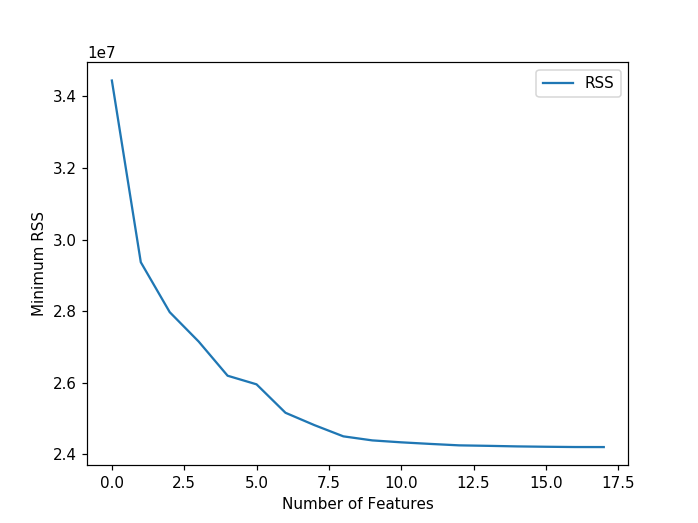

In [594]:
%matplotlib notebook
plt.plot(range(len(All_feat)), RSS, label = 'RSS')
plt.xlabel('Number of Features')
plt.ylabel('Minimum RSS')
plt.legend()

### Choosing Among Models Using the Validation Set Approach and Cross-Validation

In [602]:
#Validation set approach, we randomly split the data into training and test datasets 
np.random.seed(0)
index = np.random.choice([True, False], size=len(df))
df_train = df[index]
df_test = df[~index]

In [603]:
print('Shape of the whole dataset: {}'.format(df.shape))
print('Shape of training dataset: {}'.format(df_train.shape))
print('Shape of test dataset: {}'.format(df_test.shape))

Shape of the whole dataset: (263, 20)
Shape of training dataset: (130, 20)
Shape of test dataset: (133, 20)


In [608]:
# find best model using best subset function
best_models_train = []
for k in range(1, len(features)+1):
    print(k)
    best_models_train.append(best_k_model(df_train, features, k))

1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


In [624]:
MSE_test = []
for k in range(len(features)):
    k_features = best_models_train[k].params.index.tolist()
    
    x_test = df_test[k_features[1:]] # remove constant
    y_test = df_test['Salary']
    x_test = sm.add_constant(x_test)
    
    prediction = best_models_train[k].predict(x_test)
    
    # Calculate mean squared error (MSE) on test dataset
    MSE = np.mean((prediction - y_test.values)**2)
    MSE_test.append(MSE)

<IPython.core.display.Javascript object>


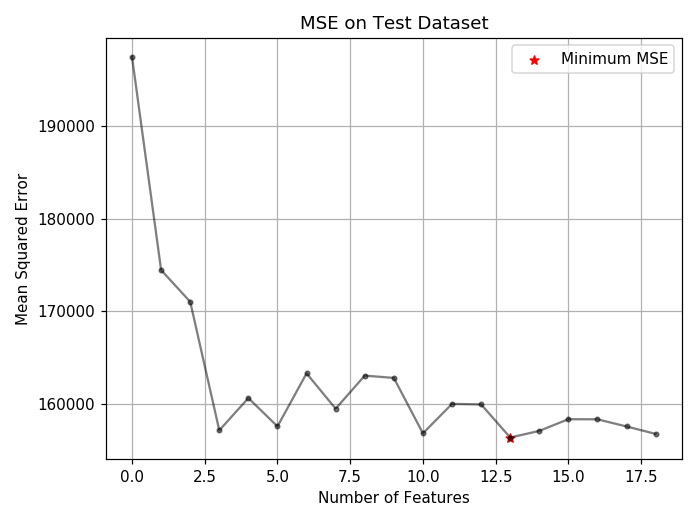

In [636]:
%matplotlib notebook
plt.plot(range(len(features)), MSE_test, marker = '.', alpha = 0.5, color = 'k')
plt.scatter(np.argmin(MSE_test), min(MSE_test), color = 'r', label = 'Minimum MSE', marker = '*', )
plt.xlabel("Number of Features")
plt.ylabel('Mean Squared Error')
plt.title('MSE on Test Dataset')
plt.grid(which = 'both')
plt.legend()
plt.tight_layout()
plt.savefig('test_MSE.png')

In [629]:
np.argmin(MSE_test)

13